# Storytelling Data Visualization on Exchange Rates

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

## Introducing the Dataset

In [2]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')
exchange_rates

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6451,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6452,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6453,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6454,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [3]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

## Data Cleaning

In [4]:
def clean_col(col):
    col = col.replace('Period\\Unit:', 'Time')
    col = col.replace('[', '')
    col = col.replace(' ]', '')
    col = col.replace(' ', '_')
    return col

exchange_rates.columns = (clean_col(c) for c in exchange_rates.columns)
exchange_rates.columns

Index(['Time', 'Australian_dollar', 'Bulgarian_lev', 'Brazilian_real',
       'Canadian_dollar', 'Swiss_franc', 'Chinese_yuan_renminbi',
       'Cypriot_pound', 'Czech_koruna', 'Danish_krone', 'Estonian_kroon',
       'UK_pound_sterling', 'Greek_drachma', 'Hong_Kong_dollar',
       'Croatian_kuna', 'Hungarian_forint', 'Indonesian_rupiah',
       'Israeli_shekel', 'Indian_rupee', 'Iceland_krona', 'Japanese_yen',
       'Korean_won', 'Lithuanian_litas', 'Latvian_lats', 'Maltese_lira',
       'Mexican_peso', 'Malaysian_ringgit', 'Norwegian_krone',
       'New_Zealand_dollar', 'Philippine_peso', 'Polish_zloty', 'Romanian_leu',
       'Russian_rouble', 'Swedish_krona', 'Singapore_dollar',
       'Slovenian_tolar', 'Slovak_koruna', 'Thai_baht', 'Turkish_lira',
       'US_dollar', 'South_African_rand'],
      dtype='object')

In [5]:
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [6]:
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()
euro_to_dollar['US_dollar'].value_counts()

US_dollar
-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: count, Length: 3769, dtype: int64

In [7]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6394 entries, 0 to 6455
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Time       6394 non-null   datetime64[ns]
 1   US_dollar  6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


## Rolling Mean

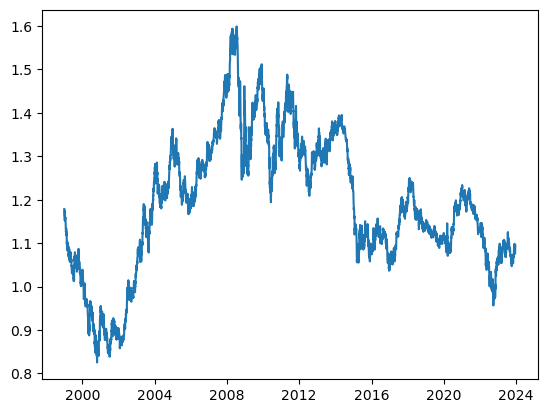

In [8]:
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

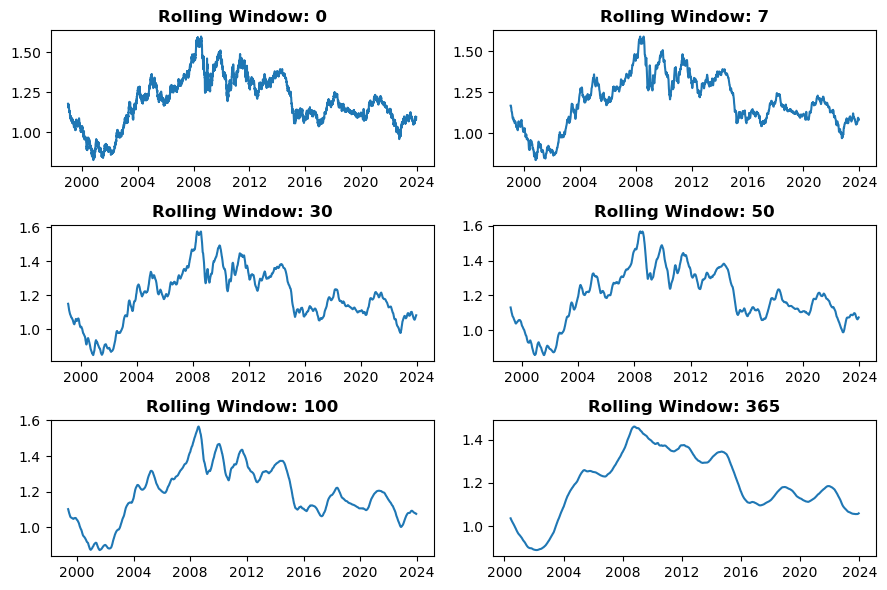

In [9]:
plt.figure(figsize=(9, 6))

plt.subplot(3, 2, 1)
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.title('Rolling Window: 0', weight='bold')

for i, r in zip([2, 3, 4, 5, 6], [7, 30, 50, 100, 365]):
    plt.subplot(3, 2, i)
    plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'].rolling(r).mean())
    plt.title('Rolling Window: ' + str(r), weight='bold')
    
plt.tight_layout()
plt.show()

In [10]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar

,Time,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
6451,2023-12-11,1.0757,1.080143
6452,2023-12-12,1.0804,1.080760
6453,2023-12-13,1.0787,1.081593
6454,2023-12-14,1.0919,1.082453


## Coming up with an Idea
Here are a few story ideas for our data:

- We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.
- We show how the euro-dollar rate changed during the 2007-2008's financial crisis. We can also show the data for 2016 and 2009 for comparison. We can use a line plot.
- We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

## Sketching a Graph

### Financial Crisis Example

In [11]:
year = euro_to_dollar['Time'].dt.year
financial_crisis = euro_to_dollar.copy()[year.between(2006, 2009)]
financial_crisis_7_8 = euro_to_dollar.copy()[(year == 2007) | (year == 2008)]

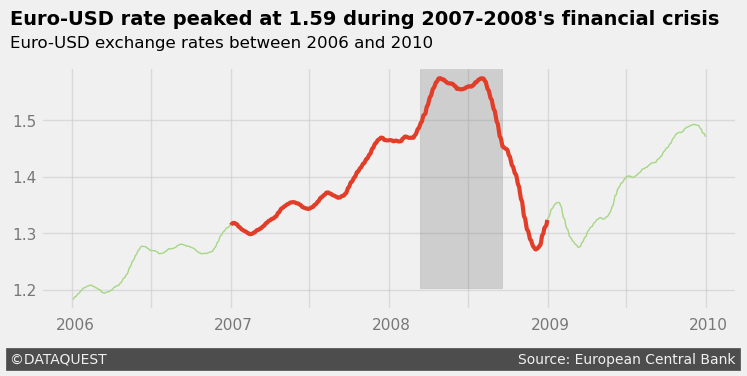

In [16]:
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(financial_crisis['Time'], financial_crisis['rolling_mean'], linewidth=1, color='#A6D785')
ax.plot(financial_crisis_7_8['Time'], financial_crisis_7_8['rolling_mean'], linewidth=3, color='#e23d28')

ax.set_xticklabels([])
ax.set_yticklabels([])

y = 1.19
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(13010, y, rate, fontsize=11, alpha=0.5)
    y += 0.1
    
x = 13110
for y in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.130, y, fontsize=11, alpha=0.5)
    x += 365
    
ax.text(13005, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis", weight='bold')
ax.text(13005, 1.63, 'Euro-USD exchange rates between 2006 and 2010', size=12)
ax.text(13005, 1.07, '©DATAQUEST' + ' '*94 + 'Source: European Central Bank', color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

ax.axvspan(xmin=13950, xmax=14140, ymin=0.09, alpha=0.3, color='grey')
ax.grid(alpha=0.6)
    
plt.show()

### The Three US Presidencies Example

In [13]:
year = euro_to_dollar['Time'].dt.year
bush = euro_to_dollar[year.between(2001, 2008)]
obama = euro_to_dollar[year.between(2009, 2016)]
trump = euro_to_dollar[year.between(2017, 2020)]

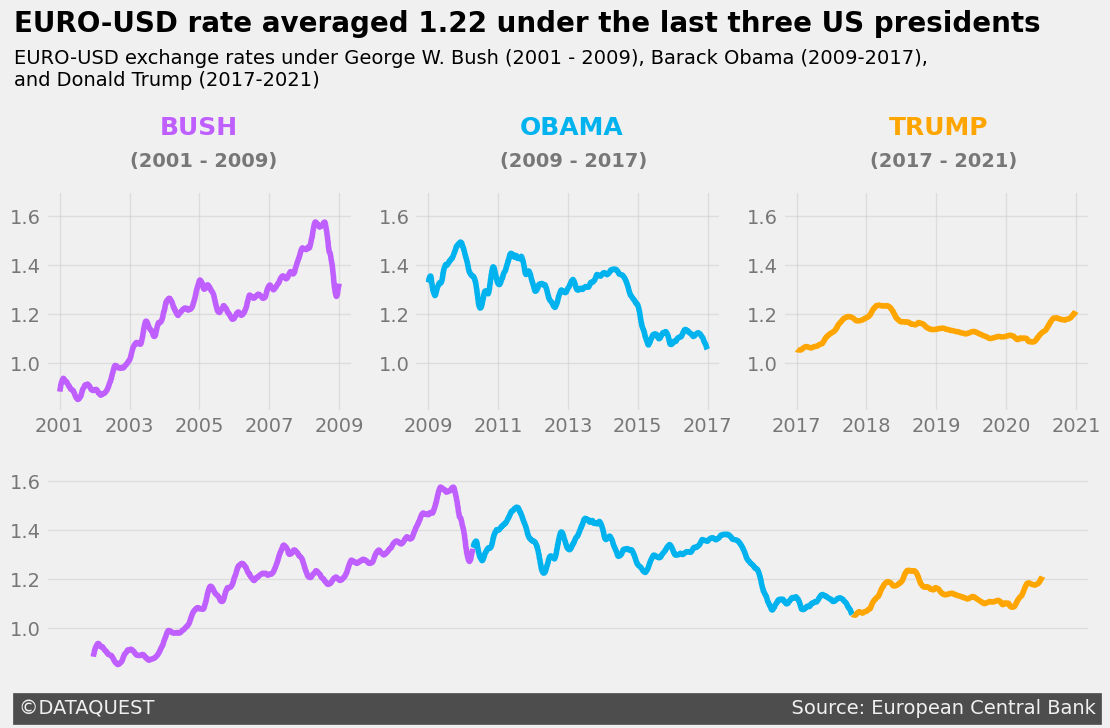

In [61]:
style.use('fivethirtyeight')

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2, 3, 1)
ax2 = plt.subplot(2, 3, 2)
ax3 = plt.subplot(2, 3, 3)
ax4 = plt.subplot(2, 1, 2)

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'], alpha=0.5)
    ax.grid(alpha=0.5)
    
#bush
ax1.plot(bush['Time'], bush['rolling_mean'], color='#BF5FFF')
ax1.set_xticks(['2001', '2003', '2005', '2007', '2009'])
ax1.set_xticklabels(['2001', '2003', '2005', '2007', '2009'], alpha=0.5)
ax1.text(12370, 1.93, 'BUSH', color='#BF5FFF', weight='bold', fontsize=18)
ax1.text(12060, 1.8, '(2001 - 2009)', weight='bold', alpha=0.5)

#obama
ax2.plot(obama['Time'], obama['rolling_mean'], color='#00B2EE')
ax2.set_xticks(['2009', '2011', '2013', '2015', '2017'])
ax2.set_xticklabels(['2009', '2011', '2013', '2015', '2017'], alpha=0.5)
ax2.text(15200, 1.93, 'OBAMA', color='#00B2EE', weight='bold', fontsize=18)
ax2.text(14999, 1.8, '(2009 - 2017)', weight='bold', alpha=0.5)

#trump
ax3.plot(trump['Time'], trump['rolling_mean'], color='#ffa500')
ax3.set_xticks(['2017','2018', '2019', '2020', '2021'])
ax3.set_xticklabels(['2017','2018', '2019', '2020', '2021'], alpha=0.5)
ax3.text(17650, 1.93, 'TRUMP', color='#ffa500', weight='bold', fontsize=18)
ax3.text(17550, 1.8, '(2017 - 2021)', weight='bold', alpha=0.5)

#three_US_presidents
ax4.plot(bush['Time'], bush['rolling_mean'], color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'], color='#00B2EE')
ax4.plot(trump['Time'], trump['rolling_mean'], color='#ffa500')
ax4.set_xticks([])

ax1.text(10840, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents', fontsize=20, weight='bold')
ax1.text(10840, 2.13, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017), 
and Donald Trump (2017-2021)''', fontsize=14)
ax4.text(10750, 0.65, '©DATAQUEST' + ' '*104 + 'Source: European Central Bank', color = '#f0f0f0', 
         backgroundcolor = '#4d4d4d', size=14)

plt.show()

In this project, we created a storytelling data visualization using the following workflow:

- We started by exploring and cleaning the data.
- We brainstormed ideas for storytelling data visualizations and chose two.
- We sketched our data visualizations using pen and paper.
- We coded the sketched data visualizations.